# Smile Recognition

In [1]:
%matplotlib inline
from pylab import *

## 获取olivetti_faces数据fetch_olivetti_faces

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces = fetch_olivetti_faces()

## face数据集，有图片，数据，标签可用

In [4]:
faces.keys()

['images', 'data', 'target', 'DESCR']

In [5]:
import sys  
print (sys.version)   
print (sys.version_info)

2.7.11 |Anaconda custom (x86_64)| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]
sys.version_info(major=2, minor=7, micro=11, releaselevel='final', serial=0)


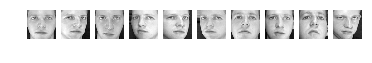

In [6]:
for i in range(10):
    face = faces.images[i]
    subplot(1, 10, i + 1)
    imshow(face.reshape((64, 64)), cmap='gray')
    axis('off')

In [7]:
from ipywidgets import interact, Button
from IPython.display import display, clear_output

In [8]:
class Trainer:
    def __init__(self):
        self.results = {}
        self.imgs = faces.images
        self.index = 0
        
    def increment_face(self):
        if self.index + 1 >= len(self.imgs):
            return self.index
        else:
            while str(self.index) in self.results:
                print (self.index)
                self.index += 1
            return self.index
    
    def record_result(self, smile=True):
        self.results[str(self.index)] = smile

In [9]:
trainer = Trainer()

## 通过button手动训练笑与不笑数据集到xml中

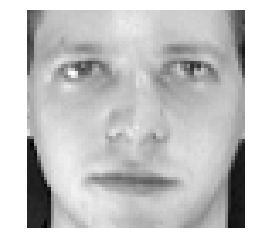

In [10]:
button_smile = Button(description='smile')
button_no_smile = Button(description='sad face')

def display_face(face):
    clear_output()
    imshow(face, cmap='gray')
    axis('off')

def update_smile(b):
    trainer.record_result(smile=True)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

def update_no_smile(b):
    trainer.record_result(smile=False)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

button_no_smile.on_click(update_no_smile)
button_smile.on_click(update_smile)

display(button_smile)
display(button_no_smile)
display_face(trainer.imgs[trainer.index])

## 将训练集写入xml

In [11]:
# with open('results.xml', 'w') as f:
#    json.dump(trainer.results, f)

## 读xml

In [12]:
import json
results = json.load(open('results.xml'))
trainer.results = results

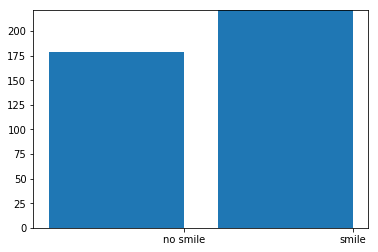

In [13]:
yes, no = (sum([trainer.results[x] == True for x in trainer.results]), 
            sum([trainer.results[x] == False for x in trainer.results]))
bar([0, 1], [no, yes])
ylim(0, max(yes, no))
xticks([0.4, 1.4], ['no smile', 'smile']);

In [14]:
smiling_indices = [int(i) for i in results if results[i] == True]

## 可视化

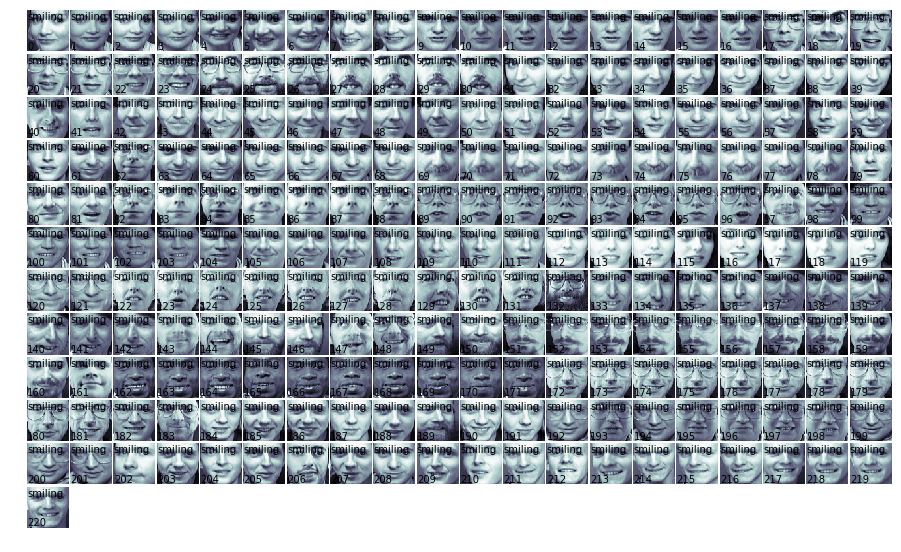

In [15]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[smiling_indices[i]], cmap=plt.cm.bone)
    
    # label the image with the target value
    p.text(0, 14, "smiling")
    p.text(0, 60, str(i))
    p.axis('off')

In [16]:
not_smiling_indices = [int(i) for i in results if results[i] == False]

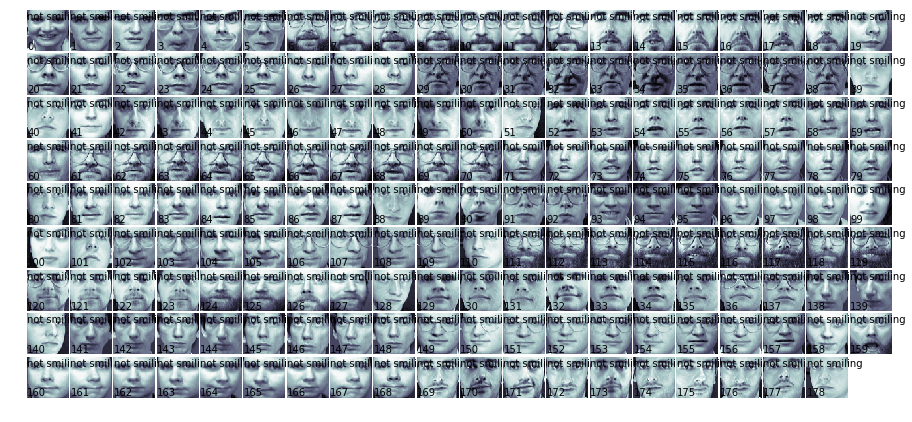

In [17]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(not_smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[not_smiling_indices[i]], cmap=plt.cm.bone)

    # label the image with the target value
    p.text(0, 14, "not smiling")
    p.text(0, 60, str(i))
    p.axis('off')

In [18]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

In [19]:
indices = [i for i in trainer.results]
# print (indices)
l=[344, 345, 346, 347, 340, 341, 342, 343, 348, 349, 298, 299, 296, 297, 294, 295, 292, 293, 290, 291, 199, 198, 195, 194, 197, 196, 191, 190, 193, 192, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 108, 109, 102, 103, 100, 101, 106, 107, 104, 105, 39, 38, 33, 32, 31, 30, 37, 36, 35, 34, 339, 338, 335, 334, 337, 336, 331, 330, 333, 332, 0, 6, 99, 98, 91, 90, 93, 92, 95, 94, 97, 96, 238, 239, 234, 235, 236, 237, 230, 231, 232, 233, 1, 146, 147, 144, 145, 142, 143, 140, 141, 148, 149, 133, 132, 131, 130, 137, 136, 135, 134, 139, 138, 24, 25, 26, 27, 20, 21, 22, 23, 28, 29, 379, 378, 371, 370, 373, 372, 375, 374, 377, 376, 393, 392, 88, 89, 397, 396, 395, 394, 82, 181, 80, 81, 86, 87, 84, 85, 7, 245, 244, 247, 246, 241, 240, 243, 242, 249, 248, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 182, 183, 180, 2, 186, 187, 184, 185, 188, 189, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 62, 322, 323, 320, 321, 326, 327, 324, 325, 328, 329, 201, 200, 203, 202, 205, 204, 207, 206, 209, 208, 77, 76, 75, 74, 73, 72, 71, 70, 79, 78, 8, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 319, 318, 313, 312, 311, 310, 317, 316, 315, 314, 3, 368, 369, 366, 367, 364, 365, 362, 363, 360, 361, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 60, 61, 258, 259, 64, 65, 66, 67, 68, 69, 250, 251, 256, 257, 254, 255, 168, 169, 164, 165, 166, 167, 160, 161, 162, 163, 9, 357, 356, 355, 354, 353, 352, 351, 350, 359, 358, 216, 217, 214, 215, 212, 213, 210, 211, 218, 219, 289, 288, 4, 281, 280, 283, 282, 285, 284, 287, 286, 263, 262, 261, 260, 267, 266, 265, 264, 269, 268, 59, 58, 55, 54, 57, 56, 51, 50, 53, 52, 63, 115, 252, 117, 116, 111, 110, 113, 253, 119, 118, 308, 309, 300, 301, 302, 303, 304, 305, 306, 307, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 114, 391, 390, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 112, 83, 399, 398, 48, 49, 46, 47, 44, 45, 42, 43, 40, 41, 5]
print (faces.data)
data = faces.data[l, :]
data[0]

[[ 0.30991736  0.36776859  0.41735536 ...,  0.15289256  0.16115703
   0.1570248 ]
 [ 0.45454547  0.47107437  0.51239669 ...,  0.15289256  0.15289256
   0.15289256]
 [ 0.31818181  0.40082645  0.49173555 ...,  0.14049587  0.14876033
   0.15289256]
 ..., 
 [ 0.5         0.53305787  0.60743803 ...,  0.17768595  0.14876033
   0.19008264]
 [ 0.21487603  0.21900827  0.21900827 ...,  0.57438016  0.59090906
   0.60330576]
 [ 0.5165289   0.46280992  0.28099173 ...,  0.35950413  0.35537189
   0.38429752]]


array([ 0.32644629,  0.32231405,  0.3140496 , ...,  0.52479339,
        0.54545456,  0.54132229], dtype=float32)

In [20]:
l =array([[1,2,3],[5,6,7],[7,8,9]])
l1 = l[1,:]
l1

array([5, 6, 7])

In [21]:
l=[344, 345, 346, 347, 340, 341, 342, 343, 348, 349, 298, 299, 296, 297, 294, 295, 292, 293, 290, 291, 199, 198, 195, 194, 197, 196, 191, 190, 193, 192, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 108, 109, 102, 103, 100, 101, 106, 107, 104, 105, 39, 38, 33, 32, 31, 30, 37, 36, 35, 34, 339, 338, 335, 334, 337, 336, 331, 330, 333, 332, 0, 6, 99, 98, 91, 90, 93, 92, 95, 94, 97, 96, 238, 239, 234, 235, 236, 237, 230, 231, 232, 233, 1, 146, 147, 144, 145, 142, 143, 140, 141, 148, 149, 133, 132, 131, 130, 137, 136, 135, 134, 139, 138, 24, 25, 26, 27, 20, 21, 22, 23, 28, 29, 379, 378, 371, 370, 373, 372, 375, 374, 377, 376, 393, 392, 88, 89, 397, 396, 395, 394, 82, 181, 80, 81, 86, 87, 84, 85, 7, 245, 244, 247, 246, 241, 240, 243, 242, 249, 248, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 182, 183, 180, 2, 186, 187, 184, 185, 188, 189, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 62, 322, 323, 320, 321, 326, 327, 324, 325, 328, 329, 201, 200, 203, 202, 205, 204, 207, 206, 209, 208, 77, 76, 75, 74, 73, 72, 71, 70, 79, 78, 8, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 319, 318, 313, 312, 311, 310, 317, 316, 315, 314, 3, 368, 369, 366, 367, 364, 365, 362, 363, 360, 361, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 60, 61, 258, 259, 64, 65, 66, 67, 68, 69, 250, 251, 256, 257, 254, 255, 168, 169, 164, 165, 166, 167, 160, 161, 162, 163, 9, 357, 356, 355, 354, 353, 352, 351, 350, 359, 358, 216, 217, 214, 215, 212, 213, 210, 211, 218, 219, 289, 288, 4, 281, 280, 283, 282, 285, 284, 287, 286, 263, 262, 261, 260, 267, 266, 265, 264, 269, 268, 59, 58, 55, 54, 57, 56, 51, 50, 53, 52, 63, 115, 252, 117, 116, 111, 110, 113, 253, 119, 118, 308, 309, 300, 301, 302, 303, 304, 305, 306, 307, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 114, 391, 390, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 112, 83, 399, 398, 48, 49, 46, 47, 44, 45, 42, 43, 40, 41, 5]

In [22]:
data = faces.data[l, :]
data

array([[ 0.32644629,  0.32231405,  0.3140496 , ...,  0.52479339,
         0.54545456,  0.54132229],
       [ 0.37603307,  0.40082645,  0.41322315, ...,  0.60743803,
         0.71074378,  0.64876032],
       [ 0.41735536,  0.44628099,  0.44628099, ...,  0.80165291,
         0.80991733,  0.79752064],
       ..., 
       [ 0.45454547,  0.42975205,  0.53719008, ...,  0.40909091,
         0.38429752,  0.38429752],
       [ 0.67768598,  0.67768598,  0.68181819, ...,  0.23553719,
         0.23140496,  0.21900827],
       [ 0.54958677,  0.54545456,  0.54132229, ...,  0.71487606,
         0.70661157,  0.70247936]], dtype=float32)

In [23]:
target = [trainer.results[i] for i in trainer.results]
target = array(target).astype(int32)

## 划分训练/测试数据

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.25, random_state=0)


In [25]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))

/Users/zhaoxuyan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.85        0.85        0.78333333  0.9         0.88333333]
Mean score: 0.853 (+/-0.020)


## 训练

In [27]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

## 评价

In [28]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.74
Classification Report:
             precision    recall  f1-score   support

          0       0.64      0.68      0.66        37
          1       0.80      0.78      0.79        63

avg / total       0.74      0.74      0.74       100

Confusion Matrix:
[[25 12]
 [14 49]]


## 预测

this person is smiling: [ True]


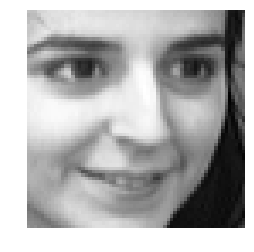

In [29]:
random_image_button = Button(description="New image!")

def display_face_and_prediction(b):
    index = randint(0, 400)
    face = faces.images[index]
    display_face(face)
    fuck = faces.data[index, :].reshape(1,-1)

    print("this person is smiling: {0}".format(svc_1.predict(fuck)==1))

random_image_button.on_click(display_face_and_prediction)
display(random_image_button)
display_face_and_prediction(0)